In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import yfinance as yf
stock_symbol = 'GOOGL'
df =yf.download(stock_symbol)
print(df)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-08-19    2.502503    2.604104    2.401401    2.511011    2.508132   
2004-08-20    2.527778    2.729730    2.515015    2.710460    2.707353   
2004-08-23    2.771522    2.839840    2.728979    2.737738    2.734599   
2004-08-24    2.783784    2.792793    2.591842    2.624374    2.621365   
2004-08-25    2.626627    2.702703    2.599600    2.652653    2.649612   
...                ...         ...         ...         ...         ...   
2024-08-14  162.399994  163.220001  157.710007  160.369995  160.369995   
2024-08-15  160.500000  161.639999  159.610001  161.300003  161.300003   
2024-08-16  161.470001  165.059998  161.130005  162.960007  162.960007   
2024-08-19  165.279999  166.690002  164.259995  166.669998  166.669998   
2024-08-20  166.899994  168.639999  166.820007  167.179993  167.179993   

               Volume  
Date         

In [3]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.508132,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.707353,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.734599,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.621365,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.649612,183772044


In [4]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,2.502503,2.604104,2.401401,2.511011,893181924
1,2.527778,2.729730,2.515015,2.710460,456686856
2,2.771522,2.839840,2.728979,2.737738,365122512
3,2.783784,2.792793,2.591842,2.624374,304946748
4,2.626627,2.702703,2.599600,2.652653,183772044


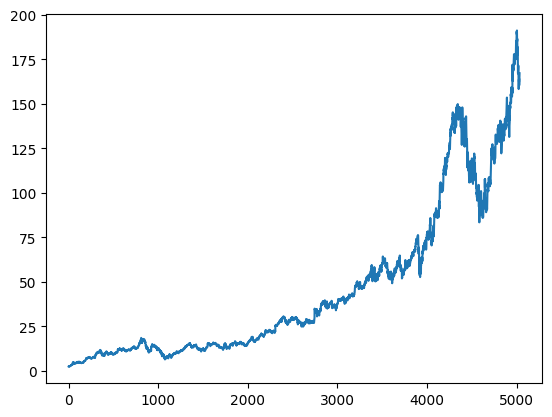

In [5]:
plt.plot(df.Close)

In [6]:
df

,Open,High,Low,Close,Volume
0,2.502503,2.604104,2.401401,2.511011,893181924
1,2.527778,2.729730,2.515015,2.710460,456686856
2,2.771522,2.839840,2.728979,2.737738,365122512
3,2.783784,2.792793,2.591842,2.624374,304946748
4,2.626627,2.702703,2.599600,2.652653,183772044
...,...,...,...,...,...
5030,162.399994,163.220001,157.710007,160.369995,40591100
5031,160.500000,161.639999,159.610001,161.300003,31524300
5032,161.470001,165.059998,161.130005,162.960007,24208600
5033,165.279999,166.690002,164.259995,166.669998,22416200


In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5030    169.7264
5031    169.8317
5032    169.9606
5033    170.1206
5034    170.2837
Name: Close, Length: 5035, dtype: float64

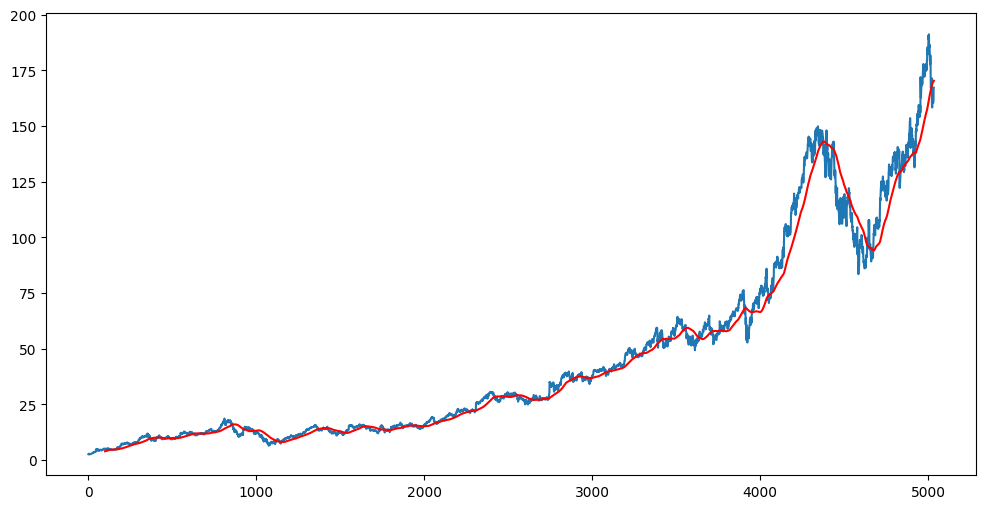

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200=stock_data.Close.rolling(200).mean()
ma200

NameError: name 'stock_data' is not defined

In [10]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

NameError: name 'stock_data' is not defined

<Figure size 1200x600 with 0 Axes>

In [11]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
from keras.models import load_model
import streamlit as st

st.title('Stock Price Prediction')

user_input = st.text_input('Enter Stock Ticker', 'GOOGL')
df = yf.download(user_input)


#describing data
st.subheader('Data from the start')
st.write(df.describe())

#visualizations
st.subheader('Closing Price vs Time chart')
fig = plt.figure(figsize = (12,6))
plt.plot(df.Close)
st.pyplot(fig) 

st.subheader('Closing Price vs Time chart with 100MA')
ma100=df.Close.rolling(100).mean()
fig = plt.figure(figsize = (12,6))
plt.plot(ma100)
plt.plot(df.Close)
st.pyplot(fig) 

st.subheader('Closing Price vs Time chart with 200MA')
ma200=df.Close.rolling(200).mean()
fig = plt.figure(figsize = (12,6))
plt.plot(ma200)
plt.plot(df.Close)
st.pyplot(fig) 

st.subheader('Closing Price vs Time chart with 100MA and 200MA')
ma100=df.Close.rolling(100).mean()
ma200=df.Close.rolling(200).mean()
fig = plt.figure(figsize = (12,6))
plt.plot(ma100)
plt.plot(ma200)
plt.plot(df.Close)
st.pyplot(fig) 

#Splitting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)

#Load the model
model = load_model('keras_model.h5')

#Testing part

past_100_days = pd.DataFrame(data_training.tail(100))
final_df = pd.concat([past_100_days,data_testing], ignore_index=True)
#final_df = past_100_days.append(data_testing, ignore_index=True)
input_data = scaler.fit_transform(final_df)

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
 x_test.append(input_data[i-100: i])
 y_test.append(input_data[i,0])
 
x_test, y_test = np.array(x_test), np.array(y_test)

#Make the prediction
y_predicted = model.predict(x_test)
scaler = scaler.scale_

scale_factor = 1/scaler[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

#Final graph
st.subheader('Predictions VS Original')
fig2, ax = plt.subplots(figsize=(12,6))
ax.plot(y_test, 'b', label = 'Original Price')
ax.plot(y_predicted, 'r', label = 'Predicted Price')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.legend()
st.pyplot(fig2)

ModuleNotFoundError: No module named 'keras'

In [13]:
from keras.models import load_model

# Load the model
model = load_model('path_to_your_model.h5')

# Use the model to make predictions
predictions = model.predict(your_data)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'path_to_your_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)